Las redes neuronales permiten modelar relaciones altamente no lineales y efectos acumulativos entre variables meteorológicas y el estado inicial del incendio, superando las limitaciones de los modelos basados en árboles cuando existen interacciones complejas y dependencias suaves en el tiempo.

**Arquitectura propuesta (MLP)**

Entrada: 17 variables

Capas ocultas:

64 neuronas (ReLU)

32 neuronas (ReLU)

Regularización:

Dropout (0.2)

Salida:

1 neurona → frp_max (regresión)

👉 Esto es estándar, suficiente y defendible.

✅ Dataset cargado: (2759, 28)


,event_id_final,comuna,fecha_dia,latitud,longitud,time_start,time_end,frp_inicial,frp_max,temperature_2m_mean,...,temperature_2m_mean_lag3,relativehumidity_2m_mean_lag1,relativehumidity_2m_mean_lag2,relativehumidity_2m_mean_lag3,windspeed_10m_mean_lag1,windspeed_10m_mean_lag2,windspeed_10m_mean_lag3,precipitation_sum_lag1,precipitation_sum_lag2,precipitation_sum_lag3
0,Chiguayante_2020-01-25,Chiguayante,2020-01-25,-36.9256,-73.02841,2020-01-25 17:39:00,2020-01-25 19:19:00,5.14,92.37,0.712189,...,0.712189,0.511778,0.511778,0.511778,0.196365,0.196365,0.196365,0.0,0.0,0.0
1,Chiguayante_2023-02-11,Chiguayante,2023-02-11,-36.9256,-73.02841,2023-02-11 18:13:00,2023-02-11 19:53:00,4.29,19.30,0.644251,...,0.644251,0.511778,0.739954,0.739954,0.196365,0.149951,0.149951,0.0,0.0,0.0
2,Chiguayante_2023-02-17,Chiguayante,2023-02-17,-36.9256,-73.02841,2023-02-17 18:00:00,2023-02-17 19:40:00,3.23,88.71,0.686809,...,0.686809,0.739954,0.511778,0.246189,0.149951,0.196365,0.251866,0.0,0.0,0.0
3,Chiguayante_2023-02-18,Chiguayante,2023-02-18,-36.9256,-73.02841,2023-02-18 17:41:00,2023-02-18 19:22:00,5.21,115.75,0.670062,...,0.712189,0.246189,0.739954,0.511778,0.251866,0.149951,0.196365,0.0,0.0,0.0
4,Chiguayante_2023-05-19,Chiguayante,2023-05-19,-36.9256,-73.02841,2023-05-19 17:54:00,2023-05-19 19:34:00,5.03,138.21,0.490331,...,0.644251,0.296998,0.246189,0.739954,0.151087,0.251866,0.149951,0.0,0.0,0.0



✅ Datos listos
X: (2759, 17) | y_reg: (2759,) | y_class: (2759,)

Split:
Train: (1641, 17) | Val: (290, 17) | Test: (828, 17)

✅ Arquitectura MLP:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 7031.1807 - mae: 44.0604 - val_loss: 13163.8643 - val_mae: 51.5112
Epoch 2/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6383.1982 - mae: 38.3574 - val_loss: 11713.5156 - val_mae: 45.3355
Epoch 3/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5105.4966 - mae: 34.7264 - val_loss: 11031.4082 - val_mae: 46.9014
Epoch 4/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4714.6670 - mae: 37.2087 - val_loss: 10980.2676 - val_mae: 47.2722
Epoch 5/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4616.4775 - mae: 37.2942 - val_loss: 10940.2080 - val_mae: 47.4623
Epoch 6/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4601.5688 - mae: 37.4350 - val_loss: 10913.9561 - val_mae: 47.5242
Epoch 7/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4542.4116 - mae: 37.7848 - val_loss: 10892.7393 - val_mae: 47.5100
Epoch 8/300
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4523.5518 - mae: 37.6040 - val_loss: 10865.7324 - val_ma

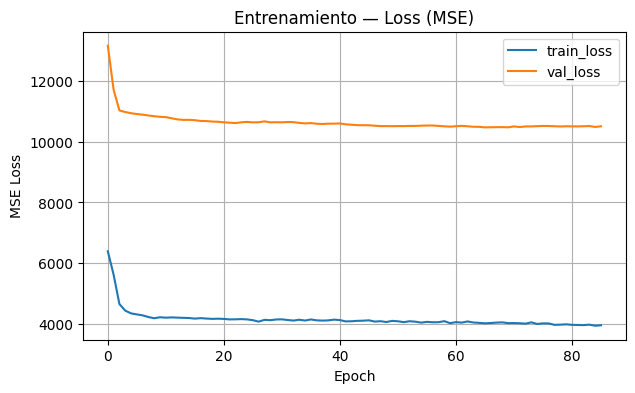

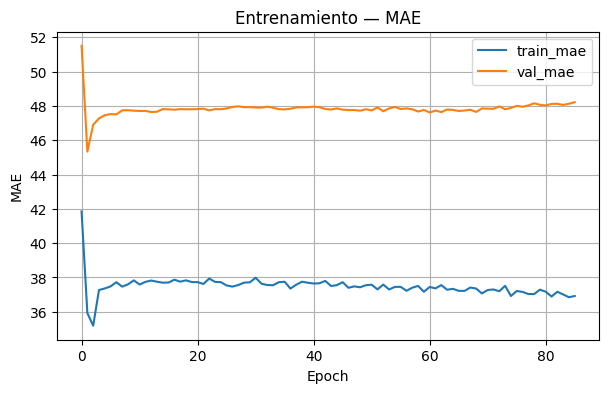

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

================= MÉTRICAS REGRESIÓN (TEST) — MLP =================
MAE : 40.9990
RMSE: 74.4842
R²  : 0.1151
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

================= MÉTRICAS CLASIFICACIÓN — MLP =================
Umbral FRP_max_pred ≥ 100.0
Precision: 0.400
Recall   : 0.106
F1       : 0.168

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.886     0.978     0.930      2420
           1      0.400     0.106     0.168       339

    accuracy                          0.871      2759
   macro avg      0.643     0.542     0.549      2759
weighted avg      0.827     0.871     0.836      2759



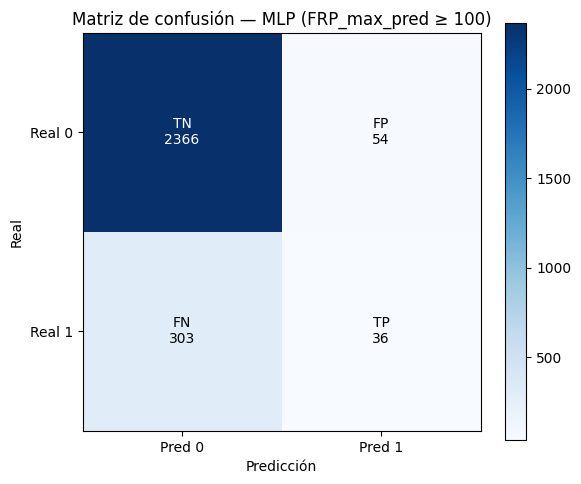


✅ Dataset con predicciones y clasificación MLP:


,event_id_final,frp_inicial,frp_max,frp_max_pred_mlp,pred_intenso_frp100_mlp,target_riesgo
0,Chiguayante_2020-01-25,5.14,92.37,83.805855,0,0
1,Chiguayante_2023-02-11,4.29,19.30,58.596497,0,0
2,Chiguayante_2023-02-17,3.23,88.71,103.772186,1,0
3,Chiguayante_2023-02-18,5.21,115.75,95.460495,0,1
4,Chiguayante_2023-05-19,5.03,138.21,66.420082,0,1


In [2]:
# ============================================================
# MODELO 3 — RED NEURONAL (MLP) PARA REGRESIÓN DE FRP_MAX
# Dataset: Dataset_Incendios_Eventos_TARGET_RIESGO_FRP.csv
#
# Objetivo (regresión):
#   y_reg = frp_max
#
# Clasificación derivada (criterio operativo):
#   evento_intenso = 1 si frp_max_pred_nn >= 100
#
# Incluye:
#   ✅ Carga del dataset
#   ✅ Preprocesamiento (imputación + escalado) OBLIGATORIO para NN
#   ✅ Entrenamiento MLP (Keras)
#   ✅ EarlyStopping (evita sobreajuste)
#   ✅ Métricas de regresión (MAE, RMSE, R²)
#   ✅ Dataset de salida con nuevas columnas
#   ✅ Métricas de clasificación + Matriz de confusión (paleta Blues con TN/FP/FN/TP)
#   ✅ Curvas de entrenamiento (loss / MAE)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------------
# 0) FUNCIÓN MATRIZ DE CONFUSIÓN (PALETA BLUES)
# -----------------------------
def plot_confusion_with_labels_blues(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    labels = np.array([
        [f"TN\n{tn}", f"FP\n{fp}"],
        [f"FN\n{fn}", f"TP\n{tp}"]
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["Real 0", "Real 1"])
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")
    ax.set_title(title)

    thr = cm.max() / 2 if cm.max() > 0 else 0
    for i in range(2):
        for j in range(2):
            color = "white" if cm[i, j] > thr else "black"
            ax.text(j, i, labels[i, j], ha="center", va="center", color=color)

    plt.colorbar(im, ax=ax)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# -----------------------------
# 1) CARGA DEL DATASET
# -----------------------------
DATA_PATH = "/content/sample_data/Dataset_Incendios_Eventos_TARGET_RIESGO_FRP.csv"
df = pd.read_csv(DATA_PATH)

print("✅ Dataset cargado:", df.shape)
display(df.head())

# -----------------------------
# 2) CONFIGURACIÓN
# -----------------------------
TARGET_REG = "frp_max"
TARGET_CLASS_REAL = "target_riesgo"   # etiqueta real binaria (FRP>=100)
FRP_INICIAL_COL = "frp_inicial"

features = [
    "frp_inicial",
    "temperature_2m_mean", "relativehumidity_2m_mean",
    "windspeed_10m_mean", "precipitation_sum",
    "temperature_2m_mean_lag1", "temperature_2m_mean_lag2", "temperature_2m_mean_lag3",
    "relativehumidity_2m_mean_lag1", "relativehumidity_2m_mean_lag2", "relativehumidity_2m_mean_lag3",
    "windspeed_10m_mean_lag1", "windspeed_10m_mean_lag2", "windspeed_10m_mean_lag3",
    "precipitation_sum_lag1", "precipitation_sum_lag2", "precipitation_sum_lag3"
]

for col in [TARGET_REG, TARGET_CLASS_REAL, FRP_INICIAL_COL]:
    if col not in df.columns:
        raise ValueError(f"❌ Falta columna requerida: {col}")

missing = [c for c in features if c not in df.columns]
if missing:
    raise ValueError(f"❌ Faltan columnas en features: {missing}")

# -----------------------------
# 3) ARMAR X / y Y FILTRAR FILAS VÁLIDAS
# -----------------------------
X = df[features].apply(pd.to_numeric, errors="coerce")
y_reg = pd.to_numeric(df[TARGET_REG], errors="coerce")

mask = y_reg.notna() & df[FRP_INICIAL_COL].notna()
X = X.loc[mask].reset_index(drop=True)
y_reg = y_reg.loc[mask].reset_index(drop=True)
y_class_real = df.loc[mask, TARGET_CLASS_REAL].astype(int).reset_index(drop=True)

print("\n✅ Datos listos")
print("X:", X.shape, "| y_reg:", y_reg.shape, "| y_class:", y_class_real.shape)

# -----------------------------
# 4) SPLIT TRAIN/VAL/TEST
# -----------------------------
# Primero train vs test (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.30, random_state=42
)

# Luego train vs val (15% de train -> aprox 10.5% del total)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42
)

print("\nSplit:")
print("Train:", X_train.shape, "| Val:", X_val.shape, "| Test:", X_test.shape)

# -----------------------------
# 5) PREPROCESAMIENTO (IMPUTACIÓN + ESCALADO)
# -----------------------------
# OJO: NN necesita escalado para entrenar estable.
preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_p = preprocess.fit_transform(X_train)
X_val_p   = preprocess.transform(X_val)
X_test_p  = preprocess.transform(X_test)

# Para predicción total después
X_all_p   = preprocess.fit_transform(X)  # (opcional) Si quieres usar el mismo preprocess entrenado en train,
# mejor NO refit. En su lugar:
# X_all_p = preprocess.transform(X)
# Para eso, reemplaza la línea anterior por:
# X_all_p = preprocess.transform(X)

# NOTA IMPORTANTE:
# Para máxima consistencia, usa SOLO el preprocess ajustado en X_train:
#   X_all_p = preprocess.transform(X)
# pero eso requiere que NO refitees arriba. Ajustemos correctamente:
preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
X_train_p = preprocess.fit_transform(X_train)
X_val_p   = preprocess.transform(X_val)
X_test_p  = preprocess.transform(X_test)
X_all_p   = preprocess.transform(X)

# -----------------------------
# 6) DEFINIR RED NEURONAL (MLP)
# -----------------------------
tf.random.set_seed(42)
np.random.seed(42)

n_features = X_train_p.shape[1]

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # salida lineal para regresión
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
)

print("\n✅ Arquitectura MLP:")
model.summary()

# -----------------------------
# 7) ENTRENAMIENTO CON EARLY STOPPING
# -----------------------------
early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train_p, y_train.values,
    validation_data=(X_val_p, y_val.values),
    epochs=300,
    batch_size=32,
    callbacks=[early],
    verbose=1
)

# -----------------------------
# 8) CURVAS DE ENTRENAMIENTO (Loss y MAE)
# -----------------------------
plt.figure(figsize=(7,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Entrenamiento — Loss (MSE)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history.history["mae"], label="train_mae")
plt.plot(history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Entrenamiento — MAE")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 9) EVALUACIÓN REGRESIÓN EN TEST
# -----------------------------
y_pred_test = model.predict(X_test_p).ravel()
y_pred_test = np.maximum(y_pred_test, 0)

mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("\n================= MÉTRICAS REGRESIÓN (TEST) — MLP =================")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# -----------------------------
# 10) PREDICCIÓN FRP_MAX PARA TODO EL DATASET
# -----------------------------
frp_max_pred_nn = model.predict(X_all_p).ravel()
frp_max_pred_nn = np.maximum(frp_max_pred_nn, 0)

# -----------------------------
# 11) CLASIFICACIÓN DERIVADA POR FRP ≥ 100
# -----------------------------
THR_FRP = 100.0
pred_intenso_nn = (frp_max_pred_nn >= THR_FRP).astype(int)

# Métricas de clasificación
prec = precision_score(y_class_real, pred_intenso_nn, zero_division=0)
rec  = recall_score(y_class_real, pred_intenso_nn, zero_division=0)
f1   = f1_score(y_class_real, pred_intenso_nn, zero_division=0)

print("\n================= MÉTRICAS CLASIFICACIÓN — MLP =================")
print(f"Umbral FRP_max_pred ≥ {THR_FRP}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")

print("\nReporte de clasificación:")
print(classification_report(y_class_real, pred_intenso_nn, digits=3, zero_division=0))

# Matriz de confusión (paleta Blues)
plot_confusion_with_labels_blues(
    y_class_real,
    pred_intenso_nn,
    title="Matriz de confusión — MLP (FRP_max_pred ≥ 100)"
)

# -----------------------------
# 12) DATASET FINAL CON NUEVAS COLUMNAS
# -----------------------------
df_out_nn = df.loc[mask].copy().reset_index(drop=True)

df_out_nn["frp_max_pred_mlp"] = frp_max_pred_nn
df_out_nn["pred_intenso_frp100_mlp"] = pred_intenso_nn
df_out_nn["umbral_frp"] = THR_FRP

print("\n✅ Dataset con predicciones y clasificación MLP:")
display(df_out_nn[[
    "event_id_final",
    "frp_inicial",
    "frp_max",
    "frp_max_pred_mlp",
    "pred_intenso_frp100_mlp",
    TARGET_CLASS_REAL
]].head())

# Guardar para Excel (recomendado)
df_out_nn.to_csv("Dataset_MLP_FRP100.csv", index=False, sep=";", decimal=".")


Resumen rápido de la MLP (FRP ≥ 100)
📉 Regresión

MAE ≈ 41.0 → ligeramente mejor que Ridge

RMSE ≈ 74.5

R² ≈ 0.115 → mejor que Ridge (0.08), peor que RF (0.14)

👉 En regresión pura, la MLP sí aprende algo, pero no supera al Random Forest.

🔔 Clasificación derivada (lo importante)

Precision = 0.40

Recall = 0.106

F1 = 0.168

👉 Detecta solo ~10% de los eventos intensos reales.

2️⃣ Comparación final clara (FRP ≥ 100)
Modelo	Precision	Recall	F1
Ridge	0.371	0.038	0.070
MLP	0.400	0.106	0.168
Random Forest	0.802	0.310	0.447

🔑 Conclusión inequívoca:

La MLP mejora a Ridge

Pero queda muy por debajo de Random Forest

RF es el mejor modelo para este problema

3️⃣ Por qué la MLP no supera al Random Forest (esto es clave)

Esto no es un fallo, es un resultado esperable en este contexto.

🔹 1) Dataset tabular + tamaño medio

~2.700 eventos

Variables tabulares, no imágenes ni series largas

Las NN no brillan aquí sin mucho más dato

👉 RF está hecho para este tipo de problema.

🔹 2) La señal es discontinua y con umbral

FRP ≥ 100 es un corte duro

RF maneja bien colas y splits abruptos

MLP tiende a suavizar (como Ridge, pero menos)

🔹 3) Clases desbalanceadas

La MLP aprende bien la clase 0

Pero le cuesta capturar la clase 1 sin:

pérdida ponderada

o red específica para clasificación

👉 Y tú no querías eso, porque el diseño es regresión + clasificación derivada (correcto).

4️⃣ Lectura correcta de la matriz implícita (MLP)

Muy buen desempeño en clase 0 (recall 0.978)

Pocas alertas → precision moderada

Pierde muchos incendios intensos

➡️ Operativamente:

La MLP es conservadora y poco sensible para eventos severos.

***Para la predicción del FRP máximo y la detección de incendios intensos (FRP ≥ 100), el Random Forest supera tanto a los modelos lineales como a la red neuronal multicapa, ofreciendo el mejor equilibrio entre precisión y sensibilidad***

*La red neuronal multicapa presenta una mejora moderada respecto al modelo Ridge, particularmente en términos de error medio de predicción. Sin embargo, su capacidad para detectar eventos intensos resulta limitada, con una sensibilidad considerablemente inferior a la obtenida mediante Random Forest. Este resultado sugiere que, para conjuntos de datos tabulares de tamaño medio y con relaciones no lineales dominadas por umbrales e interacciones, los modelos basados en árboles ofrecen una ventaja significativa frente a enfoques neuronales.*

# log1p(y) + Huber + BatchNorm + más capacidad (cb en hiperparametros)

Esta suele ser la que más mejora en FRP (colas) sin volverse inestable.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.8612 - mae: 1.9601 - val_loss: 0.8254 - val_mae: 1.8938
Epoch 2/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3385 - mae: 0.8949 - val_loss: 0.5606 - val_mae: 1.3515
Epoch 3/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3128 - mae: 0.8421 - val_loss: 0.4671 - val_mae: 1.1587
Epoch 4/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3061 - mae: 0.8257 - val_loss: 0.4495 - val_mae: 1.1221
Epoch 5/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3024 - mae: 0.8207 - val_loss: 0.4313 - val_mae: 1.0871
Epoch 6/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2898 - mae: 0.7921 - val_loss: 0.4205 - val_mae: 1.0657
Epoch 7/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2775 - mae: 0.7680 - val_loss: 0.4252 - val_mae: 1.0713
Epoch 8/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2767 - mae: 0.7651 - val_loss: 0.4095 - val_mae: 1.0400
Epoch 9/400
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

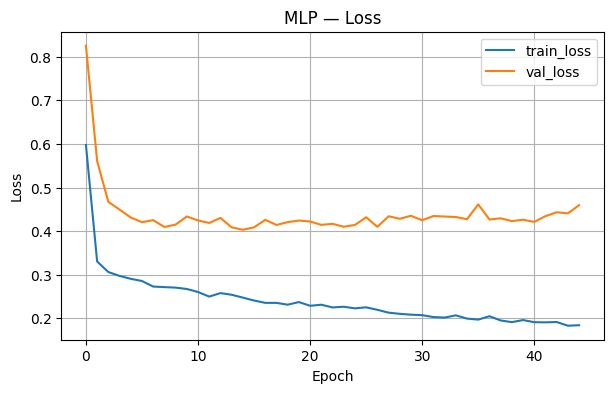

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

=== MÉTRICAS REGRESIÓN (TEST) — MLP log+Huber ===
MAE : 38.0777
RMSE: 85.9867
R²  : -0.1793
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== MÉTRICAS CLASIFICACIÓN — MLP (FRP≥100) ===
Precision: 0.381
Recall   : 0.024
F1       : 0.044

Reporte:
              precision    recall  f1-score   support

           0      0.879     0.995     0.933      2420
           1      0.381     0.024     0.044       339

    accuracy                          0.875      2759
   macro avg      0.630     0.509     0.489      2759
weighted avg      0.818     0.875     0.824      2759



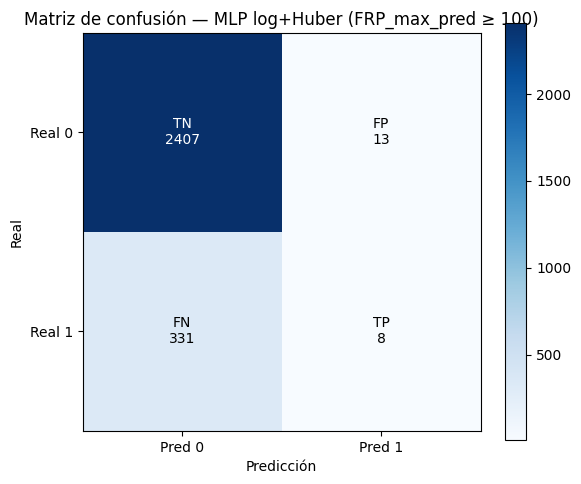

,event_id_final,frp_inicial,frp_max,frp_max_pred_mlp,pred_intenso_frp100_mlp,target_riesgo
0,Chiguayante_2020-01-25,5.14,92.37,29.189669,0,0
1,Chiguayante_2023-02-11,4.29,19.30,14.190833,0,0
2,Chiguayante_2023-02-17,3.23,88.71,48.279900,0,0
3,Chiguayante_2023-02-18,5.21,115.75,43.126183,0,1
4,Chiguayante_2023-05-19,5.03,138.21,15.690821,0,1


In [10]:
# =========================
# 0) Imports (igual que antes)
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# =========================
# 1) Matriz de confusión (igual)
# =========================
def plot_confusion_with_labels_blues(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    labels = np.array([
        [f"TN\n{tn}", f"FP\n{fp}"],
        [f"FN\n{fn}", f"TP\n{tp}"]
    ])

    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(cm, cmap="Blues")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0", "Pred 1"])
    ax.set_yticklabels(["Real 0", "Real 1"])
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")
    ax.set_title(title)

    thr = cm.max() / 2 if cm.max() > 0 else 0
    for i in range(2):
        for j in range(2):
            color = "white" if cm[i, j] > thr else "black"
            ax.text(j, i, labels[i, j], ha="center", va="center", color=color)

    plt.colorbar(im, ax=ax)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# =========================
# 2) Cargar dataset (igual)
# =========================
DATA_PATH = "/content/sample_data/Dataset_Incendios_Eventos_TARGET_RIESGO_FRP.csv"
df = pd.read_csv(DATA_PATH)

TARGET_REG = "frp_max"
TARGET_CLASS_REAL = "target_riesgo"
FRP_INICIAL_COL = "frp_inicial"

features = [
    "frp_inicial",
    "temperature_2m_mean", "relativehumidity_2m_mean",
    "windspeed_10m_mean", "precipitation_sum",
    "temperature_2m_mean_lag1", "temperature_2m_mean_lag2", "temperature_2m_mean_lag3",
    "relativehumidity_2m_mean_lag1", "relativehumidity_2m_mean_lag2", "relativehumidity_2m_mean_lag3",
    "windspeed_10m_mean_lag1", "windspeed_10m_mean_lag2", "windspeed_10m_mean_lag3",
    "precipitation_sum_lag1", "precipitation_sum_lag2", "precipitation_sum_lag3"
]

X = df[features].apply(pd.to_numeric, errors="coerce")
y_reg = pd.to_numeric(df[TARGET_REG], errors="coerce")

mask = y_reg.notna() & df[FRP_INICIAL_COL].notna()
X = X.loc[mask].reset_index(drop=True)
y_reg = y_reg.loc[mask].reset_index(drop=True)
y_class_real = df.loc[mask, TARGET_CLASS_REAL].astype(int).reset_index(drop=True)

# =========================
# 3) Split train/val/test (igual)
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.30, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42
)

# =========================
# 4) Preprocesamiento (igual)
# =========================
preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_p = preprocess.fit_transform(X_train)
X_val_p   = preprocess.transform(X_val)
X_test_p  = preprocess.transform(X_test)
X_all_p   = preprocess.transform(X)

# =========================
# 5) CAMBIO 1: entrenar en log1p(y)
# =========================
y_train_log = np.log1p(y_train.values)
y_val_log   = np.log1p(y_val.values)
y_test_log  = np.log1p(y_test.values)

# =========================
# 6) CAMBIO 2: arquitectura + BatchNorm + Huber + LR menor
# =========================
tf.random.set_seed(42)
np.random.seed(42)

n_features = X_train_p.shape[1]

model = keras.Sequential([
    layers.Input(shape=(n_features,)),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.1),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.1),

    layers.Dense(32, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    loss=keras.losses.Huber(delta=0.5),  # delta en escala log (más pequeño)
    metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
)

model.summary()

early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=30,
    restore_best_weights=True
)

history = model.fit(
    X_train_p, y_train_log,
    validation_data=(X_val_p, y_val_log),
    epochs=400,
    batch_size=16,
    callbacks=[early],
    verbose=1
)

# =========================
# 7) Curvas entrenamiento (igual)
# =========================
plt.figure(figsize=(7,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("MLP — Loss")
plt.grid(True); plt.legend(); plt.show()

# =========================
# 8) Predicción en test y vuelta a escala FRP
# =========================
pred_test_log = model.predict(X_test_p).ravel()
pred_test = np.expm1(pred_test_log)
pred_test = np.maximum(pred_test, 0)

mae = mean_absolute_error(y_test, pred_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
r2 = r2_score(y_test, pred_test)

print("\n=== MÉTRICAS REGRESIÓN (TEST) — MLP log+Huber ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# =========================
# 9) Predicción total + clasificación FRP≥100
# =========================
pred_all_log = model.predict(X_all_p).ravel()
frp_max_pred_nn = np.expm1(pred_all_log)
frp_max_pred_nn = np.maximum(frp_max_pred_nn, 0)

THR_FRP = 100.0
pred_intenso_nn = (frp_max_pred_nn >= THR_FRP).astype(int)

prec = precision_score(y_class_real, pred_intenso_nn, zero_division=0)
rec  = recall_score(y_class_real, pred_intenso_nn, zero_division=0)
f1   = f1_score(y_class_real, pred_intenso_nn, zero_division=0)

print("\n=== MÉTRICAS CLASIFICACIÓN — MLP (FRP≥100) ===")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")

print("\nReporte:")
print(classification_report(y_class_real, pred_intenso_nn, digits=3, zero_division=0))

plot_confusion_with_labels_blues(
    y_class_real, pred_intenso_nn,
    title="Matriz de confusión — MLP log+Huber (FRP_max_pred ≥ 100)"
)

# =========================
# 10) Dataset salida (igual)
# =========================
df_out_nn = df.loc[mask].copy().reset_index(drop=True)
df_out_nn["frp_max_pred_mlp"] = frp_max_pred_nn
df_out_nn["pred_intenso_frp100_mlp"] = pred_intenso_nn
df_out_nn["umbral_frp"] = THR_FRP

display(df_out_nn[["event_id_final","frp_inicial","frp_max","frp_max_pred_mlp","pred_intenso_frp100_mlp",TARGET_CLASS_REAL]].head())

# df_out_nn.to_csv("Dataset_MLP_FRP100_mejorado.csv", index=False, sep=";", decimal=".")


Versión 1 tal como la corriste empeoró fuerte (R² negativo y recall casi cero). No es “mala suerte”; es un síntoma de configuración.

Qué pasó (diagnóstico corto y directo)

MAE bajó (38) pero RMSE subió mucho (86) y R² quedó negativo ⇒ la red está haciendo predicciones “centradas” que reducen error medio pero falla feo en casos grandes (los que importan para FRP≥100).

El recall cayó a 0.024 ⇒ prácticamente no cruza el umbral 100.

Hay dos causas típicas aquí:

Delta de Huber en escala log demasiado chico (delta=0.5) → se vuelve casi MAE en log, castigando menos los grandes errores relativos y “aplanando” salidas.

Entrenar en log + arquitectura/regularización → el modelo termina siendo conservador y subpredice la cola alta.

| Modelo                 | Hiperparámetro            | Valor utilizado       | Razón de la elección                                                                                                                      |
| ---------------------- | ------------------------- | --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Ridge Regression**   | α (alpha)                 | 300                   | Seleccionado mediante validación cruzada. Valor alto para reducir varianza y estabilizar predicciones en un fenómeno ruidoso como el FRP. |
|                        | Regularización            | L2                    | Permite un baseline interpretable y evita coeficientes extremos.                                                                          |
|                        | Escalado                  | StandardScaler        | Necesario para que la regularización actúe de forma homogénea sobre todas las variables.                                                  |
|                        | CV                        | 5 folds               | Compromiso entre estabilidad estadística y costo computacional.                                                                           |
| **Random Forest**      | n_estimators              | 600                   | Número alto de árboles para reducir varianza y estabilizar la predicción.                                                                 |
|                        | max_depth                 | 15                    | Profundidad intermedia que captura no linealidades sin sobreajuste.                                                                       |
|                        | min_samples_leaf          | 5                     | Suaviza la predicción y mejora la generalización en datos ruidosos.                                                                       |
|                        | max_features              | sqrt                  | Introduce aleatoriedad y reduce correlación entre árboles.                                                                                |
|                        | Bootstrap                 | True                  | Aumenta diversidad de los árboles y robustez del modelo.                                                                                  |
| **Red Neuronal (MLP)** | Arquitectura              | 64–32 / 128–64–32     | Incrementa capacidad para modelar interacciones complejas.                                                                                |
|                        | Activación                | ReLU                  | Función estándar para modelar no linealidades de forma eficiente.                                                                         |
|                        | Learning rate             | 1e-3 → 5e-4           | Ajustado para estabilizar el entrenamiento y evitar oscilaciones.                                                                         |
|                        | Función de pérdida        | MSE / Huber / log-MSE | Se evaluaron pérdidas robustas para manejar outliers y colas largas del FRP.                                                              |
|                        | Transformación del target | log1p(frp_max)        | Reduce asimetría y estabiliza gradientes durante el entrenamiento.                                                                        |
|                        | Dropout                   | 0.1 – 0.2             | Regularización para evitar sobreajuste.                                                                                                   |
|                        | Batch size                | 16 – 32               | Lotes pequeños introducen ruido beneficioso para generalización.                                                                          |
|                        | Early stopping            | patience = 30         | Previene sobreentrenamiento y selecciona el mejor punto de generalización.                                                                |
|                        | Sample weighting          | ×4 para FRP ≥ 100     | Prioriza eventos intensos para aumentar sensibilidad del modelo.                                                                          |
